In [29]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline
import networkx as nx
import math

In [30]:
import pandas as pd
import graphviz
import networkx as nx
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn import preprocessing
from networkx.drawing.nx_agraph import graphviz_layout
%matplotlib inline

## 1. Clasificación y la entropía como función objetivo de la clasificación (15%). a. Utilizar la siguiente tabla para crear un árbol de clasificación de la variable Y a mano con 2 niveles.

<image src="../doc/arboles.jpg" alt="Descripción de la imagen">


### Segun los datos dados por la ganancia, el estrato iria de primero, debido a que tiene una mayor ganancia,  situando en el primer nivel al de el etrato 3

## b. Entrene un árbol utilizando sklearn.tree.DecisionTreeClassifier y compare los resultados. ¿Qué puede concluir son iguales?

In [31]:
df = pd.read_excel("../doc/Libro1.xlsx")
df

,ingresos,estrato,credito
0,1,2,0
1,5,2,0
2,1,4,1
3,6,0,0
4,8,5,1
5,4,0,0
6,3,5,1
7,6,2,0
8,3,5,1
9,3,2,0


In [32]:
df.head(2)

,ingresos,estrato,credito
0,1,2,0
1,5,2,0


In [33]:
features_name = ["ingresos","estrato"]
X = df[features_name]
y = df["credito"]

In [34]:
from sklearn import preprocessing, tree


le_dt = preprocessing.LabelEncoder()
le_type = preprocessing.LabelEncoder()
X = df[features_name]
y = df["credito"]
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<Axes: xlabel='name'>

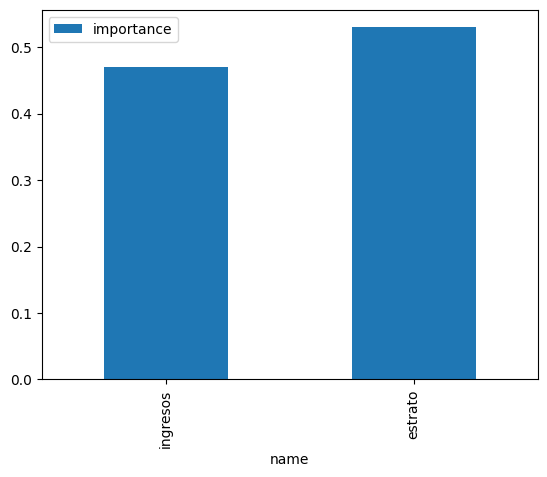

In [35]:
pd.DataFrame([(k,v) for k,v in  zip(features_name,clf.feature_importances_)],
            columns=["name","importance"]).plot.bar(x="name",y="importance")

In [36]:

import graphviz


dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features_name,  
                         class_names=["Env","NoEnv"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  


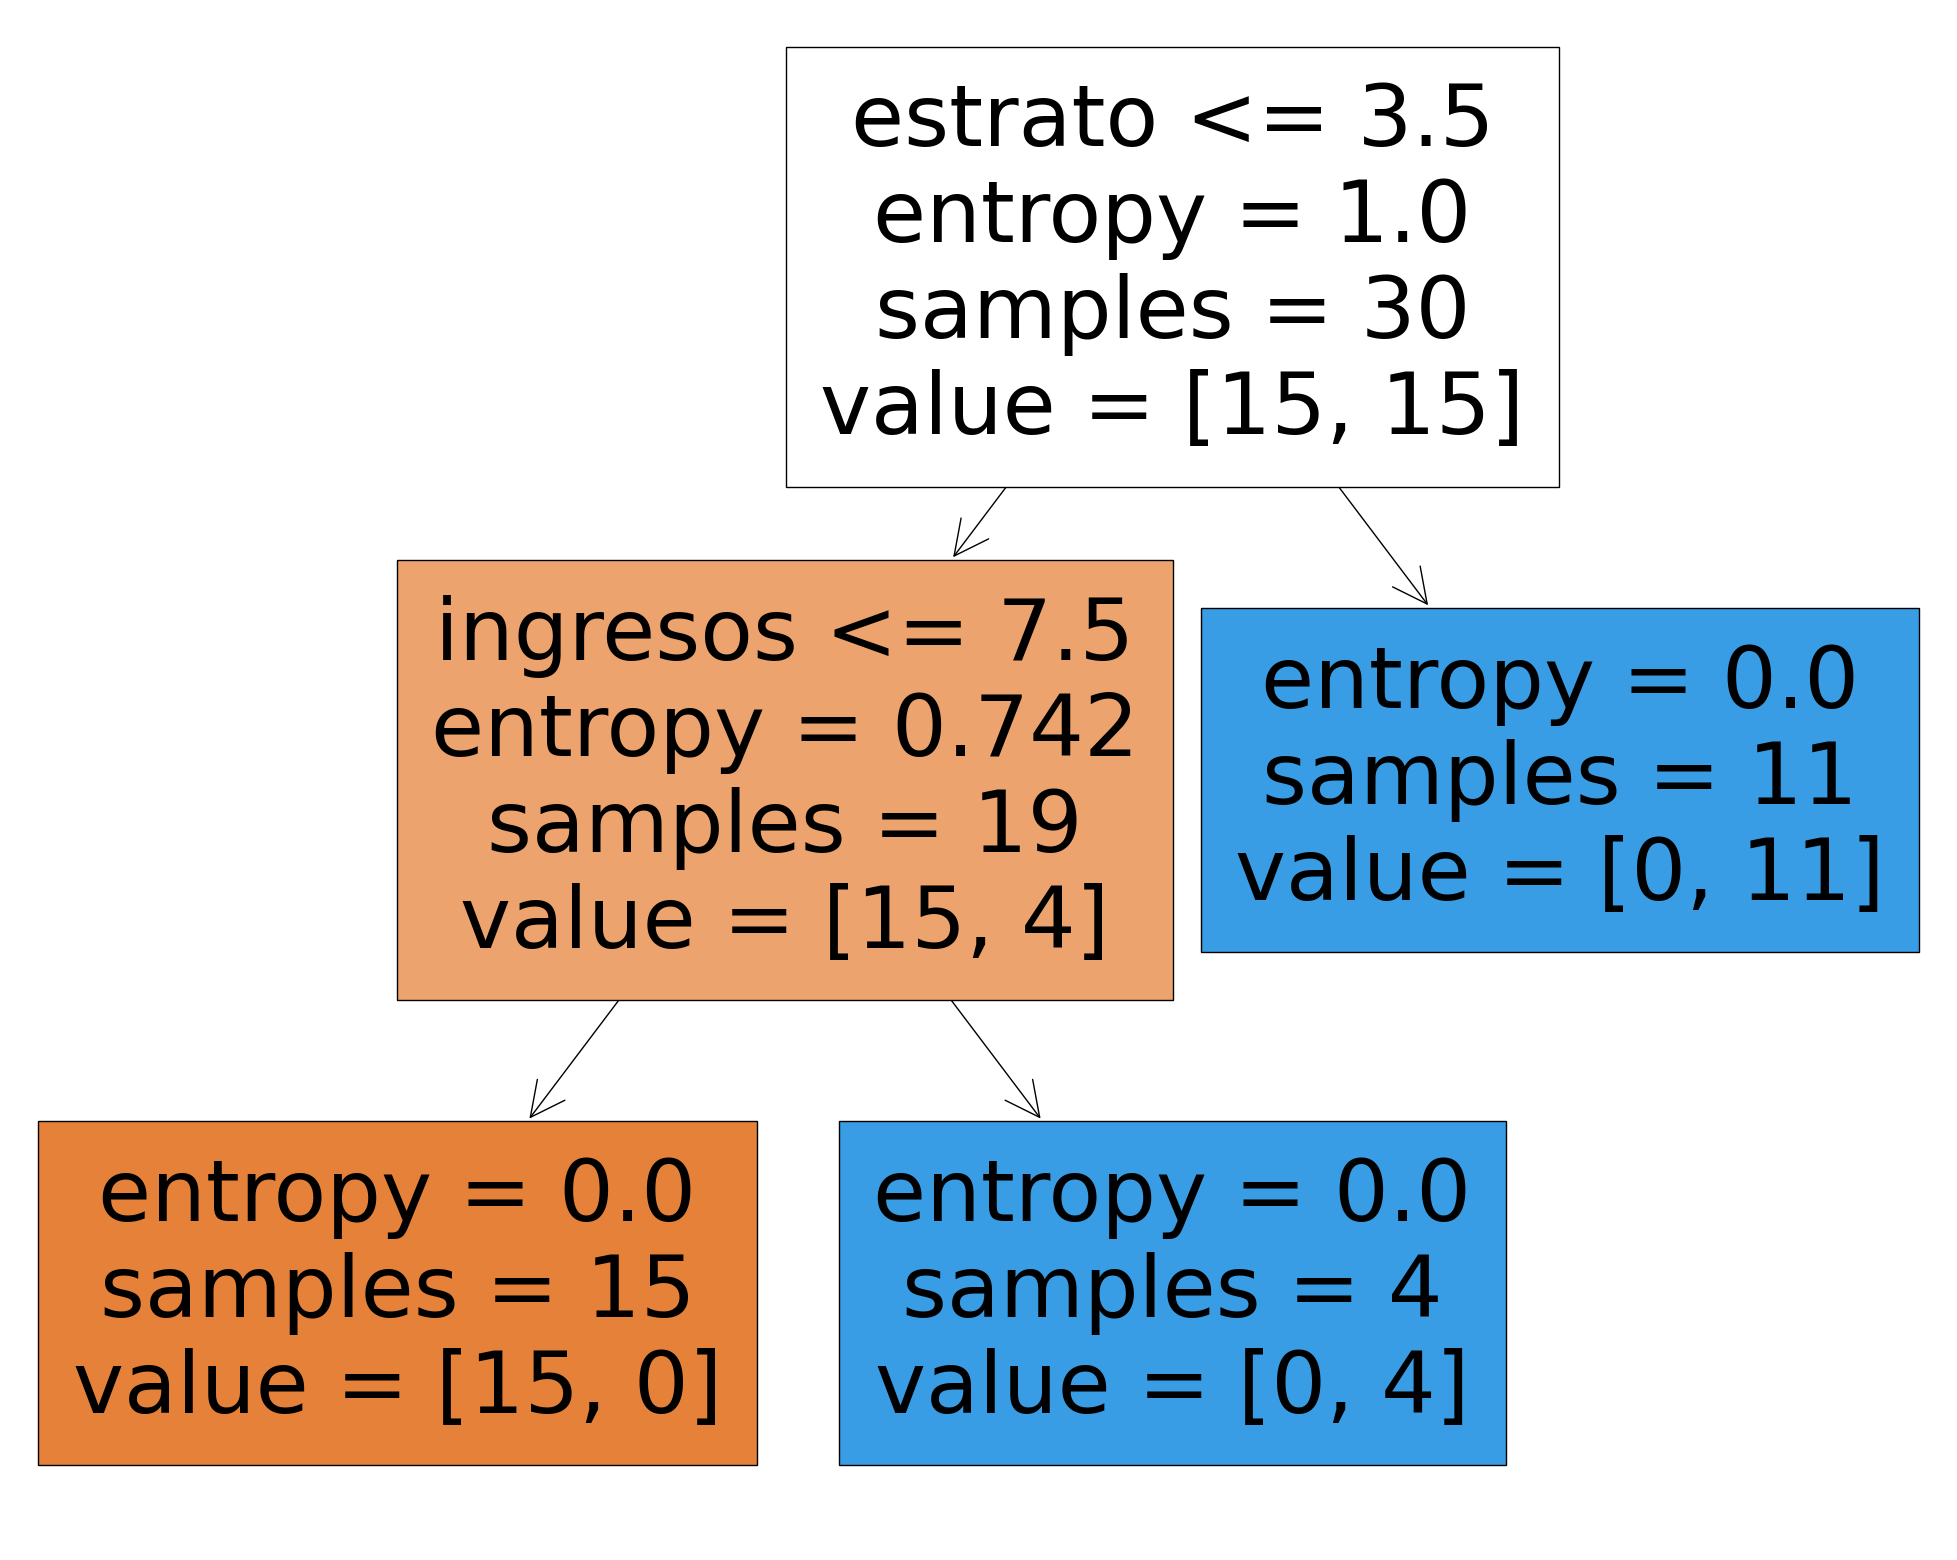

In [37]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=features_name, 
                    filled=True)

### ¿Son iguales?
realmente no son iguales, el modelo realizado con Sklearn da una mayor presicion